In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###  Reproduce the pop1 and pop2 populations and samples using numpy's binomial function. Specifically, create two binomially distributed populations with n equal to 10 and size equal to 10000. The p-value of pop1 should be 0.2 and the p-value of pop2 should be 0.5. Using a sample size of 100, calculate the means and standard deviations of your samples.

In [31]:
pop1 = np.random.binomial(n = 10, p = 0.2, size = 10000)
pop2 = np.random.binomial(n = 10, p = 0.5, size = 10000)

In [32]:
sample1 = np.random.choice(pop1, size = 100, replace = True)
sample2 = np.random.choice(pop2, size = 100, replace = True)

In [33]:
print('Mean of sample 1: {}'.format(sample1.mean()))
print('Mean of sample 2: {}'.format(sample2.mean()))
print('Standard deviation of sample 1: {}'.format(sample1.std()))
print('Standard deviation of sample 2: {}'.format(sample2.std()))

Mean of sample 1: 2.08
Mean of sample 2: 4.96
Standard deviation of sample 1: 1.2859237924542803
Standard deviation of sample 2: 1.5932357013323548


### 1 - Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?

In [34]:
sample1_1000 = np.random.choice(pop1, size = 1000, replace = True)
sample2_1000 = np.random.choice(pop2, size = 1000, replace = True)

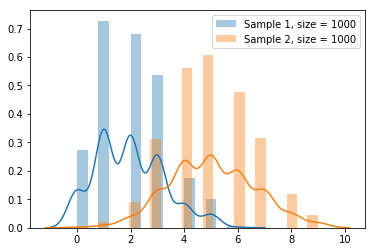

In [35]:
sns.distplot(sample1_1000, label = 'Sample 1, size = 1000')
sns.distplot(sample2_1000, label = 'Sample 2, size = 1000')
plt.legend()

In [37]:
print('Mean of sample 1, size = 1000: {}'.format(sample1_1000.mean()))
print('Mean of sample 2, size = 1000: {}'.format(sample2_1000.mean()))
print('Standard deviation of sample 1, size = 1000: {}'.format(sample1_1000.std()))
print('Standard deviation of sample 2, size = 1000: {}'.format(sample2_1000.std()))

Mean of sample 1, size = 1000: 1.972
Mean of sample 2, size = 1000: 5.033
Standard deviation of sample 1, size = 1000: 1.2716980773752864
Standard deviation of sample 2, size = 1000: 1.6055874314405927


In [38]:
sample1_20 = np.random.choice(pop1, size = 20, replace = True)
sample2_20 = np.random.choice(pop2, size = 20, replace = True)

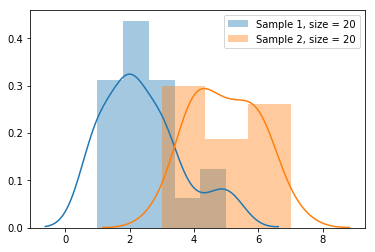

In [41]:
sns.distplot(sample1_20, label = 'Sample 1, size = 20')
sns.distplot(sample2_20, label = 'Sample 2, size = 20')
plt.legend()

In [40]:
print('Mean of sample 1, size = 20: {}'.format(sample1_20.mean()))
print('Mean of sample 2, size = 20: {}'.format(sample2_20.mean()))
print('Standard deviation of sample 1, size = 20: {}'.format(sample1_20.std()))
print('Standard deviation of sample 2, size = 20: {}'.format(sample2_20.std()))

Mean of sample 1, size = 20: 2.4
Mean of sample 2, size = 20: 4.95
Standard deviation of sample 1, size = 20: 1.2
Standard deviation of sample 2, size = 20: 1.023474474522936


for population 1, mean hovered at around 2, but both std dev and mean varied a lot based on sample size.  For population 2, mean was very near 5 for all sample sizes, despite variability in std dev.  

### 2 - Change the probability value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the probability value p for group 1 to 0.4, and do it again. What changes, and why?

In [44]:
pop1 = np.random.binomial(n = 10, p = 0.3, size = 10000)
pop2 = np.random.binomial(n = 10, p = 0.5, size = 10000)

In [45]:
sample1 = np.random.choice(pop1, size = 100, replace = True)
sample2 = np.random.choice(pop2, size = 100, replace = True)

In [56]:
diff = sample1.mean() - sample2.mean()
size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])

diff_se = (sum(sd ** 2 / size)) ** 0.5  

t_value = diff/diff_se

In [57]:
print('Mean of sample 1: {}'.format(sample1.mean()))
print('Mean of sample 2: {}'.format(sample2.mean()))
print('Standard deviation of sample 1'.format(sample1.std()))
print('Standard deviation of sample 2'.format(sample2.std()))
print('t-value: {}'.format(t_value))

Mean of sample 1: 2.89
Mean of sample 2: 4.94
Standard deviation of sample 1
Standard deviation of sample 2
t-value: -9.19153137622159


In [49]:
from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=9.1454582471118027, pvalue=8.2331698922047224e-17)


pop1 p value =0.4

In [58]:
pop1 = np.random.binomial(n = 10, p = 0.4, size = 10000)
pop2 = np.random.binomial(n = 10, p = 0.5, size = 10000)

In [59]:
sample1 = np.random.choice(pop1, size = 100, replace = True)
sample2 = np.random.choice(pop2, size = 100, replace = True)

In [62]:
print('Mean of sample 1: {}'.format(sample1.mean()))
print('Mean of sample 2: {}'.format(sample2.mean()))
print('Standard deviation of sample 1'.format(sample1.std()))
print('Standard deviation of sample 2'.format(sample2.std()))
print('t-value: {}'.format(ttest_ind(sample2, sample1, equal_var=False)))

Mean of sample 1: 3.85
Mean of sample 2: 5.19
Standard deviation of sample 1
Standard deviation of sample 2
t-value: Ttest_indResult(statistic=6.5358588462331699, pvalue=5.2549534500822335e-10)


as p values of the two populations become more similar, the t-value shrinks and p-value gets larger

### 3 - Change the distribution of your populations from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?

In [65]:
pop1 = np.random.logistic(loc = 10, scale = 1, size = 10000)
pop2 = np.random.logistic(loc = 5, scale = 1, size = 10000)

In [67]:
sample1 = np.random.choice(pop1, size = 100, replace = True)
sample2 = np.random.choice(pop2, size = 100, replace = True)

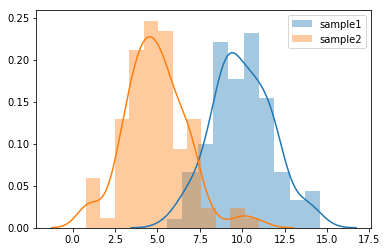

In [68]:
sns.distplot(sample1, label = 'sample1')
sns.distplot(sample2, label = 'sample2')
plt.legend()

In [69]:
print('Mean of sample 1: {}'.format(sample1.mean()))
print('Mean of sample 2: {}'.format(sample2.mean()))
print('Standard deviation of sample 1'.format(sample1.std()))
print('Standard deviation of sample 2'.format(sample2.std()))
print('t-value: {}'.format(ttest_ind(sample2, sample1, equal_var=False)))

Mean of sample 1: 9.988116246736514
Mean of sample 2: 4.8942076911082415
Standard deviation of sample 1
Standard deviation of sample 2
t-value: Ttest_indResult(statistic=-19.818580453343266, pvalue=7.0369677591304877e-49)


Mean is still representative of population.  Sample is large enough.